# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [49]:
#seu código aqui
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

df = pd.read_csv("m17_tratado2.csv", delimiter=",")
df.head(5)



,Age,Income,Number of Children,Gender_Male,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Single,Home Ownership_Rented,Credit Score_High,Credit Score_Low
0,25.0,50000.0,0,False,True,False,False,False,True,True,True,False
1,30.0,100000.0,2,True,False,False,False,True,False,False,True,False
2,35.0,75000.0,1,False,False,True,False,False,False,False,True,False
3,40.0,125000.0,0,True,False,False,True,False,True,False,True,False
4,50.0,150000.0,0,True,False,False,False,True,False,False,True,False


In [50]:
# 1. Reconstruir a variável alvo
def reconstroi_alvo(row):
    if row["Credit Score_High"] == True:
        return "High"
    elif row["Credit Score_Low"] == True:
        return "Low"
    else:
        return "Medium"

df["Credit_Score"] = df.apply(reconstroi_alvo, axis=1)  # <-- agora a coluna existe

# 2. Definir X e y
X = df.drop(["Credit Score_High", "Credit Score_Low", "Credit_Score"], axis=1)
y = df["Credit_Score"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape X_train:", X_train.shape)
print("Shape X_test: ", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test: ", y_test.shape)


# Verificando o balanceamento antes
print("Antes do SMOTE:", Counter(y_train))

# Criando o objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicando o SMOTE na base de treino
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Verificando o balanceamento após o SMOTE
print("Após o SMOTE:", Counter(y_train_bal))  


Shape X_train: (127, 10)
Shape X_test:  (32, 10)
Shape y_train: (127,)
Shape y_test:  (32,)
Antes do SMOTE: Counter({'High': 87, 'Medium': 28, 'Low': 12})
Após o SMOTE: Counter({'High': 87, 'Low': 87, 'Medium': 87})


# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [51]:
#seu código aqui

# Criação de uma instância do classificador Naive Bayes Gaussiano
naive_bayes = GaussianNB()
# Treinamento do classificador usando os dados de treinamento
naive_bayes.fit(X_train_bal, y_train_bal)


GaussianNB()

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

Acurácia (treino): 0.9846743295019157
Recall (treino): 0.9846743295019157

Relatório de Classificação (treino):
               precision    recall  f1-score   support

        High       1.00      0.98      0.99        87
         Low       0.98      1.00      0.99        87
      Medium       0.98      0.98      0.98        87

    accuracy                           0.98       261
   macro avg       0.98      0.98      0.98       261
weighted avg       0.98      0.98      0.98       261



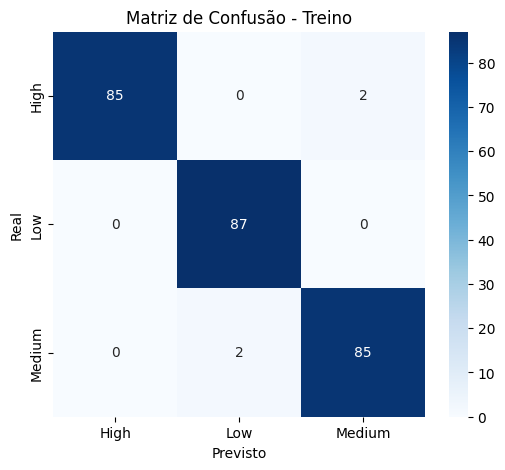

In [52]:
#seu código aqui

from sklearn.metrics import classification_report

# Avaliação no conjunto de treino
y_train_pred = naive_bayes.predict(X_train_bal)

# Acurácia
acc = accuracy_score(y_train_bal, y_train_pred)
print("Acurácia (treino):", acc)

# Recall (macro → média das classes)
rec = recall_score(y_train_bal, y_train_pred, average="macro")
print("Recall (treino):", rec)

# Relatório detalhado
print("\nRelatório de Classificação (treino):\n", classification_report(y_train_bal, y_train_pred))

# Matriz de confusão
cm = confusion_matrix(y_train_bal, y_train_pred, labels=naive_bayes.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Treino")
plt.show()


**Avaliação** - Coma a base de treino devidamente balanceada, o modelo apresenta excelentes resultado com uma assertividade de 98%, agora vamos verificar se não houve um overfitting ou se o modelo realmente generalizou bem.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia (teste): 0.9375
Recall (teste): 0.9682539682539683

Relatório de Classificação (teste):
               precision    recall  f1-score   support

        High       1.00      0.90      0.95        21
         Low       1.00      1.00      1.00         3
      Medium       0.80      1.00      0.89         8

    accuracy                           0.94        32
   macro avg       0.93      0.97      0.95        32
weighted avg       0.95      0.94      0.94        32



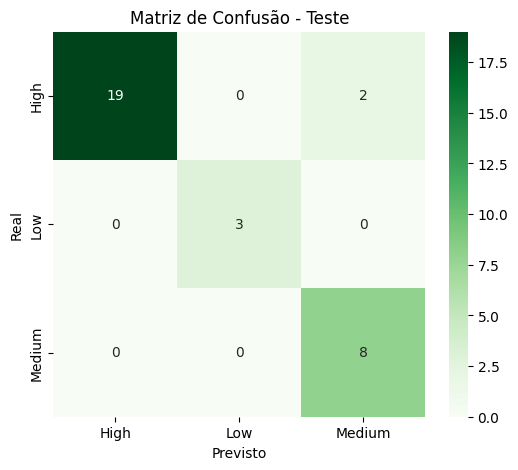

In [53]:
#seu código aqui

# Avaliação no conjunto de teste
y_test_pred = naive_bayes.predict(X_test)

# Acurácia
acc_test = accuracy_score(y_test, y_test_pred)
print("Acurácia (teste):", acc_test)

# Recall (macro → média das classes)
rec_test = recall_score(y_test, y_test_pred, average="macro")
print("Recall (teste):", rec_test)

# Relatório detalhado
print("\nRelatório de Classificação (teste):\n", classification_report(y_test, y_test_pred))

# Matriz de confusão
cm_test = confusion_matrix(y_test, y_test_pred, labels=naive_bayes.classes_)

plt.figure(figsize=(6,5))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Greens", xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Teste")
plt.show()


**Avaliação** - Esse resultado confirma que o modelo esta bem projetado, comprovando não ser um overfitting

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

O projeto foi desenvolvido para poder classificar categoricamente o Score dos clientes, com base em diversos dados, aplicamos o algoritmo Naive Bayes após o tratamento e balanceamento de dados, e apresentou excelentes resultados. Naive Bayes é o um excelente algoritmo para categorizar, sendo assim utilizamos ele pra identificar possiveis Scores dos clientes e obtivemos uma assertividade de 98%  